In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Reproducing the Stationary Plots

In [179]:
class StationaryTestbed():
    def __init__(self, k=10, n=2_000, n_steps=10_000) -> None:
        self.k: int = k
        self.q_values = np.random.normal(loc=0, scale=1, size=(n, k))
        self.rewards = []
        for i in range(n):
            reward = np.array([np.random.normal(loc=q, scale=1, size=(n_steps,)) for q in self.q_values[i]])
            self.rewards.append(reward)

        self.rewards = np.array(self.rewards)

In [172]:
class ActionValue():
    def __init__(self, eps=0.0, k=10, n_estimators=2_000):
        self.eps = eps
        self.k = k
        self.n_estimators = n_estimators
        self.n_steps = np.zeros((self.n_estimators, self.k))
        self.action_values = np.zeros((self.n_estimators, self.k))

    def select_actions(self):
        is_greedy = np.random.random(size=self.n_estimators) >= self.eps
        greedy_actions = np.argmax(np.random.random(self.action_values.shape) * (self.action_values == self.action_values.max(axis=1)[:, np.newaxis]), axis=1)
        res = np.where(is_greedy, greedy_actions, np.random.randint(0, 10, self.n_estimators))
        return res

    def update(self, actions, rewards):
        self.n_steps[np.arange(self.n_estimators), actions] += 1
        values_to_update = self.action_values[np.arange(self.n_estimators), actions]
        values_to_update += (rewards - values_to_update) / self.n_steps[np.arange(self.n_estimators), actions]
        self.action_values[np.arange(self.n_estimators), actions] = values_to_update

In [180]:
n_estimators = 2_000
n_steps = 10_000
average_rewards_greedy = []
average_rewards_seps = []
average_rewards_leps = []
testbed = StationaryTestbed(n=n_estimators, n_steps=n_steps)
greedy = ActionValue(eps=0.0)
small_eps = ActionValue(eps=0.01)
large_eps = ActionValue(eps=0.1)
optimal_actions = testbed.q_values.argmax(axis=1)
optimal_percent_greedy, optimal_percent_seps, optimal_percent_leps = [], [], []

def step(av_method, average_rewards, optimal_percent, step):
    actions = av_method.select_actions()
    optimal_percent.append((actions == optimal_actions).sum() / len(optimal_actions) * 100)
    rewards = testbed.rewards[np.arange(n_estimators), actions, step]
    av_method.update(actions, rewards)
    average_rewards.append(sum(rewards)/len(rewards))

for i in range(n_steps):
    step(greedy, average_rewards_greedy, optimal_percent_greedy, i)
    step(small_eps, average_rewards_seps, optimal_percent_seps, i)
    step(large_eps, average_rewards_leps, optimal_percent_leps, i)
    
    print(f"{i}/{n_steps}", end='\r')

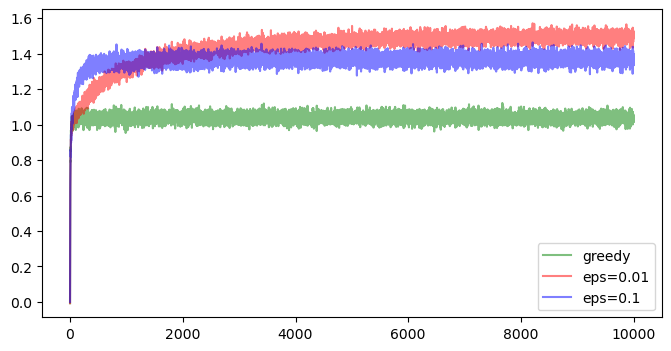

In [183]:
plt.figure(figsize=(8,4))
plt.plot(list(range(n_steps)), average_rewards_greedy, label="greedy", alpha=0.5, color="green")
plt.plot(list(range(n_steps)), average_rewards_seps, label="eps=0.01", alpha=0.5, color="red")
plt.plot(list(range(n_steps)), average_rewards_leps, label="eps=0.1", alpha=0.5, color="blue")
plt.legend();

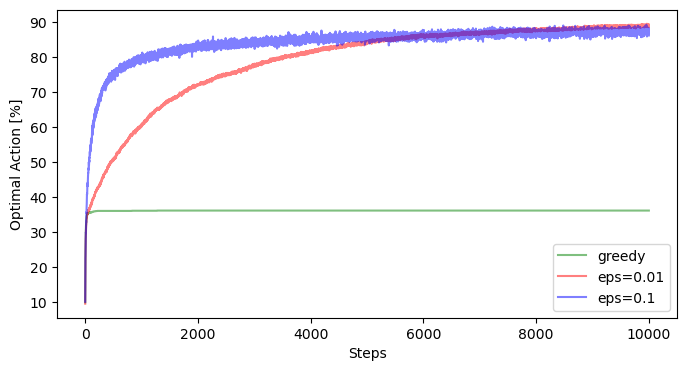

In [185]:
plt.figure(figsize=(8,4))
plt.plot(list(range(n_steps)), optimal_percent_greedy, label="greedy", alpha=0.5, color="green")
plt.plot(list(range(n_steps)), optimal_percent_seps, label="eps=0.01", alpha=0.5, color="red")
plt.plot(list(range(n_steps)), optimal_percent_leps, label="eps=0.1", alpha=0.5, color="blue")
plt.xlabel("Steps")
plt.ylabel("Optimal Action [%]")
plt.legend();

### Non Stationary Case (via independent random walks, ex. 2.5)

In [188]:
class NonStationaryTestbed():
    def __init__(self, k=10, n=2_000, n_steps=10_000):
        self.k = k
        self.q_values = np.zeros((n,k))
        self.rewards = []
        for i in range(n):
            reward = np.array([np.random.normal(loc=q, scale=1, size=(n_steps,)) for q in self.q_values[i]])
            self.rewards.append(reward)
            self.q_values += np.random.normal(loc=0, scale=0.01, size=(n, k)) # random walks

        self.rewards = np.array(self.rewards)

In [189]:

n_estimators = 2_000
n_steps = 10_000
average_rewards_greedy = []
average_rewards_seps = []
average_rewards_leps = []
testbed = NonStationaryTestbed(n=n_estimators, n_steps=n_steps)
greedy = ActionValue(eps=0.0)
small_eps = ActionValue(eps=0.01)
large_eps = ActionValue(eps=0.1)
optimal_actions = testbed.q_values.argmax(axis=1)
optimal_percent_greedy, optimal_percent_seps, optimal_percent_leps = [], [], []

def step(av_method, average_rewards, optimal_percent, step):
    actions = av_method.select_actions()
    optimal_percent.append((actions == optimal_actions).sum() / len(optimal_actions) * 100)
    rewards = testbed.rewards[np.arange(n_estimators), actions, step]
    av_method.update(actions, rewards)
    average_rewards.append(sum(rewards)/len(rewards))

for i in range(n_steps):
    step(greedy, average_rewards_greedy, optimal_percent_greedy, i)
    step(small_eps, average_rewards_seps, optimal_percent_seps, i)
    step(large_eps, average_rewards_leps, optimal_percent_leps, i)
    
    print(f"{i}/{n_steps}", end='\r')

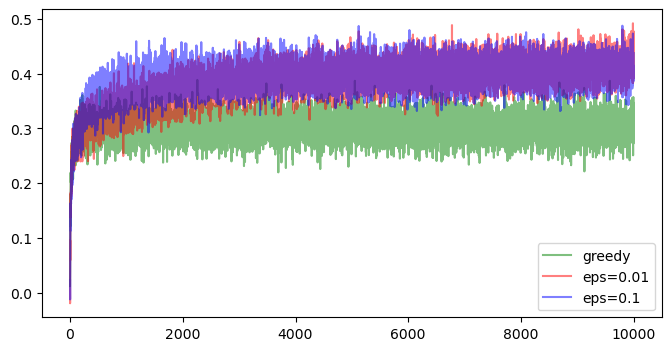

In [190]:
plt.figure(figsize=(8,4))
plt.plot(list(range(n_steps)), average_rewards_greedy, label="greedy", alpha=0.5, color="green")
plt.plot(list(range(n_steps)), average_rewards_seps, label="eps=0.01", alpha=0.5, color="red")
plt.plot(list(range(n_steps)), average_rewards_leps, label="eps=0.1", alpha=0.5, color="blue")
plt.legend();

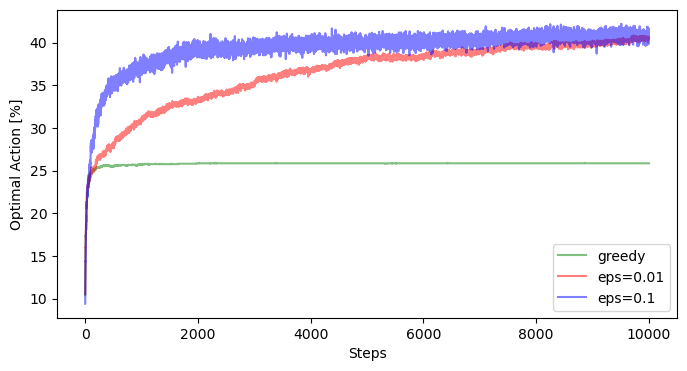

In [191]:
plt.figure(figsize=(8,4))
plt.plot(list(range(n_steps)), optimal_percent_greedy, label="greedy", alpha=0.5, color="green")
plt.plot(list(range(n_steps)), optimal_percent_seps, label="eps=0.01", alpha=0.5, color="red")
plt.plot(list(range(n_steps)), optimal_percent_leps, label="eps=0.1", alpha=0.5, color="blue")
plt.xlabel("Steps")
plt.ylabel("Optimal Action [%]")
plt.legend();